In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\world-university-rankings" (use force=True to force download)


In [4]:
data_dir = './world-university-rankings'

In [5]:
import os
os.listdir(data_dir)

['cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'education_expenditure_supplementary_data.csv',
 'school_and_country_table.csv',
 'shanghaiData.csv',
 'timesData.csv']

In [6]:
project_name = "world_universities_comparison"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import pandas as pd
import numpy as np

In [9]:
data= pd.read_csv('world-university-rankings/timesData.csv')

In [10]:
data.shape

(2603, 14)

In [11]:
data.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [12]:
data.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [13]:
data.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [14]:
data['income'] = data['income'].replace(data['income'][data.income=='-'],0)
#data['total_score'] = data['total_score'].replace(data['total_score'][data.total_score==0],m)
data['international_students'] = data['international_students'].fillna(0)
data['female_male_ratio'] = data['female_male_ratio'].replace(np.nan,'50:50')

In [15]:
data['total_score'] = data['total_score'].replace(data['total_score'][data.total_score=='-'],0)


In [16]:
data['world_rank']=pd.to_numeric(data.world_rank,errors='coerce')
data['international']=pd.to_numeric(data.international,errors='coerce')
data['income']=pd.to_numeric(data.income)
data['total_score']=pd.to_numeric(data.total_score)
data['international_students']=pd.to_numeric(data['international_students'].str.replace(r"[^\d]", ""))

#data['female_male_ratio']=pd.to_numeric(data.female_male_ratio,error='coerce')

In [17]:
data['num_students']=pd.to_numeric(data['num_students'].str.replace(r"[^\d]", ""))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1112 non-null   float64
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   float64
 8   total_score             2603 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2603 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(10), int64(1), object(3)
memo

In [19]:
m=data['total_score'].sum()/data['total_score'][data.total_score!=0].count()
data['total_score'] = data['total_score'].replace(data['total_score'][data.total_score==0],m)

In [20]:
data.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,50:50,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929.0,8.4,27.0,45 : 55,2011
5,6.0,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34.0,46 : 54,2011
6,6.0,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34.0,46 : 54,2011
7,8.0,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,0.0,91.1,36186.0,16.4,15.0,50 : 50,2011
8,9.0,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51.0,37 : 63,2011
9,10.0,Yale University,United States of America,92.1,59.2,89.7,91.5,0.0,89.5,11751.0,4.4,20.0,50 : 50,2011


In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We can identify the top 10 countries with the highest number of universities listed in the data

In [22]:
top_countries= data.country.value_counts().head(10)
top_countries

United States of America    659
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
Japan                        98
Italy                        94
China                        83
Netherlands                  75
France                       73
Name: country, dtype: int64

We can visualize this information using a bar chart.

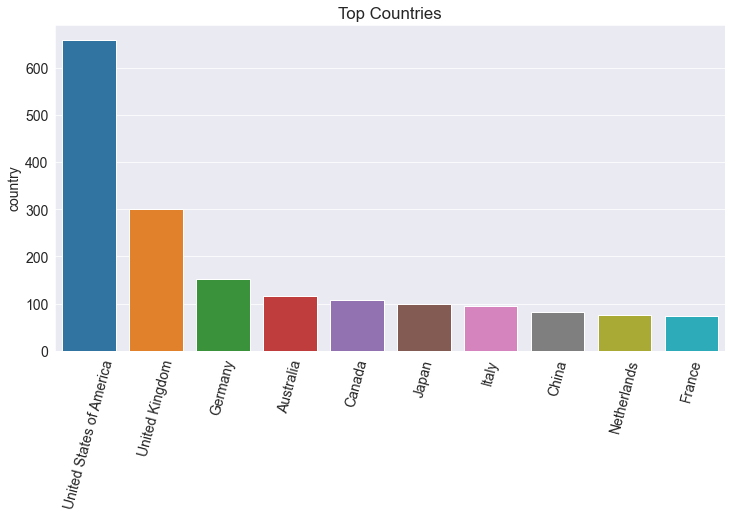

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Countries') 
sns.barplot(x=top_countries.index, y=top_countries);


Let us find out the top 5 universities in the world in 2016 

In [24]:
top_universities= data[data.world_rank<=5][data.year==2016]
top_universities

<ipython-input-24-d25775b6c82f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_universities= data[data.world_rank<=5][data.year==2016]


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33 : 67,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46 : 54,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42 : 58,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46 : 54,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37 : 63,2016


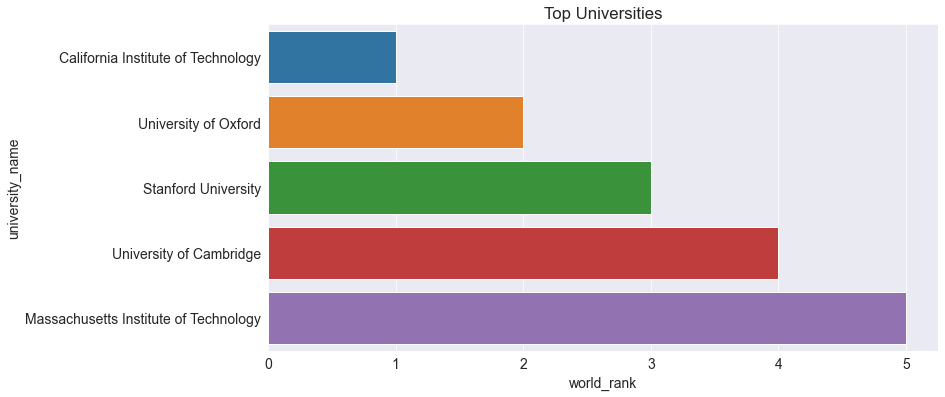

In [25]:
plt.figure(figsize=(12,6))
plt.title('Top Universities')
sns.barplot(x=top_universities.world_rank, y=top_universities.university_name);


We found out that California Institute of Technology in USA ranked 1 among the world universities in 2016

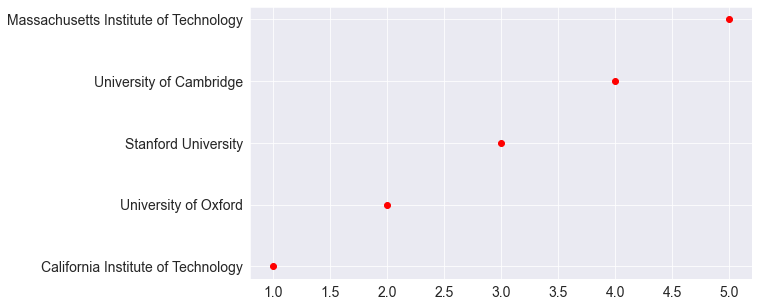

In [27]:
plt.plot(top_universities.world_rank,top_universities.university_name,'or')

>

We earlier found that USA and UK are the top 2 countries to have their universities to get top ranked. Now let us check the year-wise distribution of ranking of the top 5 universities in USA and UK 

<ipython-input-28-794b52d344fd>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top=  data[data['country'].isin(countries)][data.world_rank<=5]


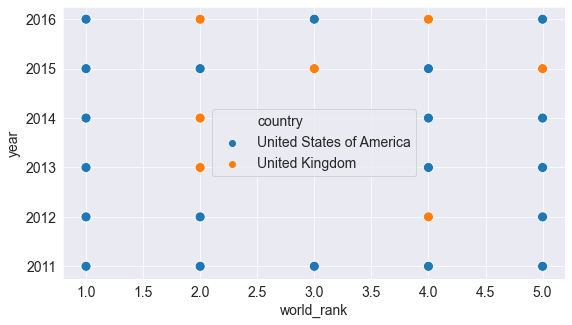

In [28]:
countries=['United States of America', 'United Kingdom']
top=  data[data['country'].isin(countries)][data.world_rank<=5]
sns.scatterplot(x=top.world_rank, y=top.year, hue=top.country, s=100)

In [29]:
top=  data[data['country'].isin(countries)][data.world_rank <=5]
top

<ipython-input-29-5c5ae8630ba0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top=  data[data['country'].isin(countries)][data.world_rank <=5]


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,50:50,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929.0,8.4,27.0,45 : 55,2011
200,1.0,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,2243.0,6.9,27.0,33 : 67,2012
201,2.0,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,20152.0,8.9,25.0,50:50,2012
202,2.0,Stanford University,United States of America,94.8,57.2,98.9,99.8,63.8,93.9,15596.0,7.8,22.0,42 : 58,2012
203,4.0,University of Oxford,United Kingdom,89.5,91.9,96.6,97.9,62.1,93.6,19919.0,11.6,34.0,46 : 54,2012
204,5.0,Princeton University,United States of America,91.5,49.6,99.1,100.0,81.0,92.9,7929.0,8.4,27.0,45 : 55,2012


In [30]:
top.shape

(30, 14)

Taking a look at the role of Research work in the decision of world rank in 2016

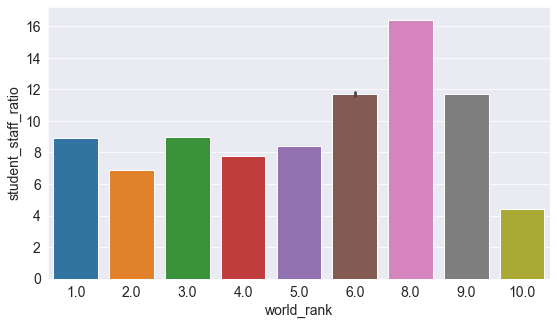

In [31]:
sns.barplot(x=data['world_rank'].head(10), y=data['student_staff_ratio']) 

This shows that the world rank does not necessarily depend on the Student-Staff ratio alone always

>
Let us find out which universities have the lowest and highest ratio of international students in 2016

In [32]:
data['international_student_ratio']=(data['international_students']/data['num_students'])*1000
data[data.international_student_ratio==data['international_student_ratio'].max()][data.year==2016]

<ipython-input-32-e67900e53427>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.international_student_ratio==data['international_student_ratio'].max()][data.year==2016]


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_student_ratio
2089,NaN,Royal College of Surgeons in Ireland,Republic of Ireland,29.9,90.1,20.1,65.3,33.9,59.846128,2473.0,15.6,63.0,55 : 45,2016,25.475131


Royal College of Surgeons in Ireland has the highest proportion of international students with 63 international students out of 2473 total students

In [33]:
min_international=data[data.international_student_ratio==data['international_student_ratio'].min()][data.year==2016]
min_international

<ipython-input-33-a7ebb2accf45>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_international=data[data.international_student_ratio==data['international_student_ratio'].min()][data.year==2016]


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_student_ratio
2240,NaN,Indian Institute of Technology Kharagpur,India,33.2,13.3,30.5,41.4,31.7,59.846128,9928.0,17.5,0.0,15 : 85,2016,0.0
2243,NaN,Iran University of Science and Technology,Iran,25.9,12.2,26.0,42.3,61.2,59.846128,10311.0,23.9,0.0,24 : 76,2016,0.0
2283,NaN,Sharif University of Technology,Iran,26.6,15.9,30.1,33.7,87.8,59.846128,10977.0,18.7,0.0,27 : 73,2016,0.0
2334,NaN,Indian Institute of Technology Kanpur,India,33.1,16.4,15.0,31.5,28.0,59.846128,6167.0,12.2,0.0,13 : 87,2016,0.0
2338,NaN,Jadavpur University,India,32.8,7.7,22.2,31.8,33.8,59.846128,10697.0,16.1,0.0,30 : 70,2016,0.0
2379,NaN,Quaid-i-azam University,Pakistan,17.9,35.4,9.9,45.6,0.0,59.846128,12688.0,25.7,0.0,53 : 47,2016,0.0
2424,NaN,"Birla Institute of Technology and Science, Pilani",India,18.3,13.7,8.3,17.4,29.6,59.846128,11837.0,19.5,0.0,22 : 78,2016,0.0
2431,NaN,University of Calcutta,India,34.7,13.1,8.7,19.8,29.2,59.846128,18511.0,32.5,0.0,50:50,2016,0.0
2437,NaN,Chang Gung University,Taiwan,19.3,15.7,24.7,27.6,31.9,59.846128,7506.0,12.6,0.0,42 : 58,2016,0.0
2459,NaN,University of Electronic Science and Technolog...,China,20.5,13.4,12.9,8.8,28.0,59.846128,21689.0,9.8,0.0,21 : 79,2016,0.0


In [34]:
min_international.shape

(19, 15)

There are 19 universities that has no international intake of students

In [42]:
data[data['total_score']>95]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_student_ratio
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,50:50,2011,1.240572
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011,12.037450
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011,2.979953
602,1.0,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,2243.0,6.9,27.0,33 : 67,2013,12.037450
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33 : 67,2016,12.037450
